IMPORT BASIC LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mso
import plotly.express as px
import seaborn as sns

LOAD DATASET

In [2]:
df=pd.read_csv("spam.csv", encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


CLEANNING DATASET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


DROP UNUSEED COLUMNS

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

RENAME COLUMNS

In [6]:
df.rename(columns = {'v1': 'Target', 'v2': 'Text'}, inplace = True)

CONVERTING CATIGORICAL COLUMNES TO NUMARICAL

In [7]:
df.Target.unique()

array(['ham', 'spam'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target']= encoder.fit_transform(df['Target'])
# If you want to inverse transform the labels back to their original values
original_labels = encoder.inverse_transform(df['Target'])


CHECK THE NULLVALUE

Target    0
Text      0
dtype: int64

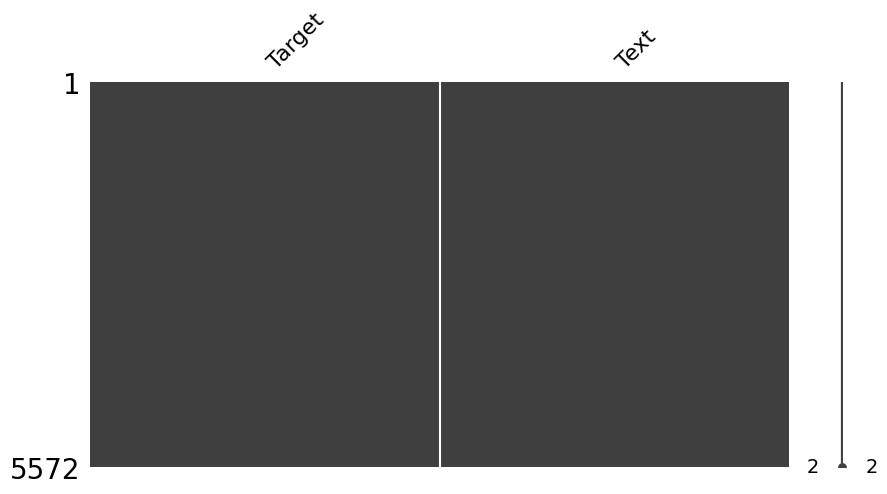

In [9]:
mso.matrix(df,figsize=(10,5))

df.isnull().sum()

CHECK THE DUPLICATE AND DROP IT

In [10]:
df.duplicated().sum()

403

In [11]:
df.drop_duplicates(keep='first')

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


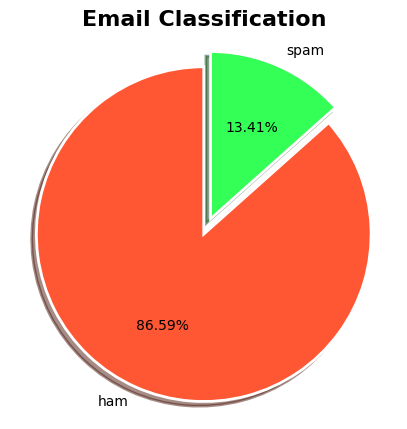

In [12]:
values = df['Target'].value_counts()
total = values.sum()

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Explode the second slice (spam) by 10%
explode = (0, 0.1)

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(values, labels=['ham', 'spam'], autopct='%0.2f%%', startangle=90,
        colors=colors, explode=explode, shadow=True, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Email Classification', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()


DATA PREPROCESSING

In [13]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [14]:
def transform_text(text):
    # Convert text to lowercase
    Text = text.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Initialize a Porter Stemmer
    stemmer = PorterStemmer()
    
    # Filter out stopwords, punctuation, and apply stemming
    filtered_tokens = [stemmer.stem(token) for token in tokens
                       if token not in stopwords.words('english') and token not in string.punctuation]
    
    # Join the filtered tokens into a single string
    processed_text = " ".join(filtered_tokens)
    
    return processed_text


In [15]:
df['transformed_text'] = df['Text'].apply(transform_text)

CHECK THE MOST FREQUENT WORD USED IN SPAM AND NORMAL MASSEGE

In [16]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

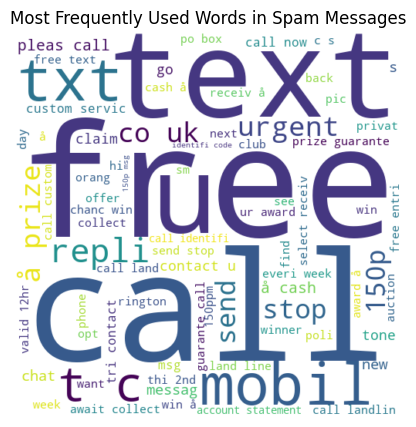

In [17]:
spam_message = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.title("Most Frequently Used Words in Spam Messages")
plt.show()

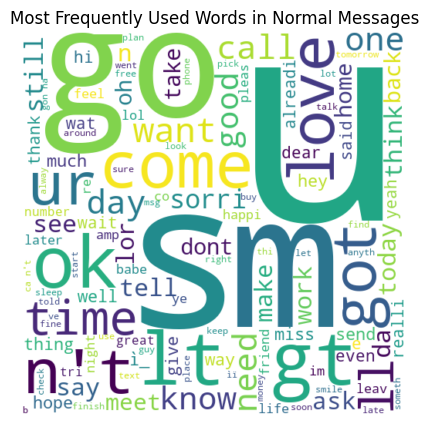

In [18]:
spam_message = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.title("Most Frequently Used Words in Normal Messages")
plt.show()


MODEL BUILDING

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import  train_test_split ,StratifiedKFold ,cross_val_score ,GridSearchCV


In [20]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 2500)

In [21]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=5)

In [22]:
oversam= SMOTE(k_neighbors=55,random_state=0)
x_features_smoted, y_features_smoted = oversam.fit_resample(X,y)

In [23]:
kfold = StratifiedKFold(n_splits=10)
random_state=30
clas = []
clas.append(LogisticRegression(random_state=random_state))
clas.append(DecisionTreeClassifier(random_state=random_state))
clas.append(RandomForestClassifier(random_state=random_state))
clas.append(GaussianNB())
clas.append(KNeighborsClassifier())
clas.append(SVC(random_state=random_state))
clas.append(AdaBoostClassifier(random_state=random_state))
clas.append(BaggingClassifier(random_state=random_state))
clas.append(GradientBoostingClassifier(random_state=random_state))
clas.append(XGBClassifier())
clas.append(MultinomialNB())
clas.append(BernoulliNB())
cv_result = []
for classi in clas:
    cv_result.append(cross_val_score(classi , X_train, y=y_train, scoring='accuracy',cv=kfold, n_jobs=5,))

cv_mean =[]
cv_std =[]
for result in cv_result:
    cv_mean.append(result.mean())
    cv_std.append(result.std())

cv = pd.DataFrame({'Cross_val_score':cv_mean, 'Cross_val_error':cv_std,'Algorithm':['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GaussianNB', 'KNeighborsClassifier', 'SVC','AdaBoostClassifier','BaggingClassifier','GradientBoostingClassifier','XGBClassifier','MultinomialNB','BernoulliNB']})

In [25]:
cv.sort_values(by='Cross_val_score',ascending=False)

,Cross_val_score,Cross_val_error,Algorithm
11,0.984068,0.004654,BernoulliNB
5,0.980926,0.006758,SVC
10,0.980030,0.006690,MultinomialNB
2,0.979579,0.005371,RandomForestClassifier
9,0.974642,0.007725,XGBClassifier
6,0.973746,0.007107,AdaBoostClassifier
8,0.969708,0.006058,GradientBoostingClassifier
0,0.967013,0.009384,LogisticRegression
7,0.964999,0.005042,BaggingClassifier
1,0.958264,0.006468,DecisionTreeClassifier


In [26]:
LR = LogisticRegression()
LR.fit(X,y)
LR.score(X_test,y_test)

0.9838565022421525

In [27]:
DTC = DecisionTreeClassifier()
DTC.fit(X,y)
DTC.score(X_test,y_test)

1.0

In [28]:
RFC = RandomForestClassifier()
RFC.fit(X,y)
RFC.score(X_test,y_test)

1.0

In [29]:
GNB = GaussianNB()
GNB.fit(X,y)
GNB.score(X_test,y_test)

0.8834080717488789

In [30]:
KNC = KNeighborsClassifier()
KNC.fit(X,y)
KNC.score(X_test,y_test)

0.9434977578475336

In [31]:
MNB = MultinomialNB()
MNB.fit(X,y)
MNB.score(X_test,y_test)

0.9847533632286996

In [40]:
ypred = RFC.predict(X_test)
accuracy_score(y_test, ypred)

1.0

In [42]:
report = classification_report(y_test, ypred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00       137

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115



In [43]:
import pickle

In [44]:
pickle.dump(LR, open('Email spam Detection.pkl', 'wb'))